# training

In [1]:
import numpy as np
import gzip

# load training images
with gzip.open('data_fashion_mnist/train-images-idx3-ubyte.gz', 'rb') as f:
    X_train = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28*28)

# load testing images
with gzip.open('data_fashion_mnist/t10k-images-idx3-ubyte.gz', 'rb') as f:
    X_test = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28*28)

# load training labels
with gzip.open('data_fashion_mnist/train-labels-idx1-ubyte.gz', 'rb') as f:
    y_train = np.frombuffer(f.read(), np.uint8, offset=8)
    
# load testing labels
with gzip.open('data_fashion_mnist/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    y_test = np.frombuffer(f.read(), np.uint8, offset=8)
    

# check data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [2]:
import tensorflow as tf
import tensorflow.keras as keras

# create model
model = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [12]:
# optimizer and loss
model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

# training
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    batch_size=256, epochs=10, verbose=2)

Epoch 1/10
235/235 - 2s - loss: 899.4094 - sparse_categorical_accuracy: 0.7987 - val_loss: 1718.6788 - val_sparse_categorical_accuracy: 0.7935 - 2s/epoch - 8ms/step
Epoch 2/10
235/235 - 1s - loss: 906.8298 - sparse_categorical_accuracy: 0.8020 - val_loss: 2020.5186 - val_sparse_categorical_accuracy: 0.6521 - 827ms/epoch - 4ms/step
Epoch 3/10
235/235 - 1s - loss: 841.5069 - sparse_categorical_accuracy: 0.8045 - val_loss: 1634.5955 - val_sparse_categorical_accuracy: 0.7585 - 942ms/epoch - 4ms/step
Epoch 4/10
235/235 - 1s - loss: 889.8962 - sparse_categorical_accuracy: 0.7983 - val_loss: 2271.3225 - val_sparse_categorical_accuracy: 0.6033 - 825ms/epoch - 4ms/step
Epoch 5/10
235/235 - 1s - loss: 840.9905 - sparse_categorical_accuracy: 0.8055 - val_loss: 805.9890 - val_sparse_categorical_accuracy: 0.7698 - 909ms/epoch - 4ms/step
Epoch 6/10
235/235 - 1s - loss: 888.4384 - sparse_categorical_accuracy: 0.8023 - val_loss: 542.4574 - val_sparse_categorical_accuracy: 0.8142 - 964ms/epoch - 4ms/st

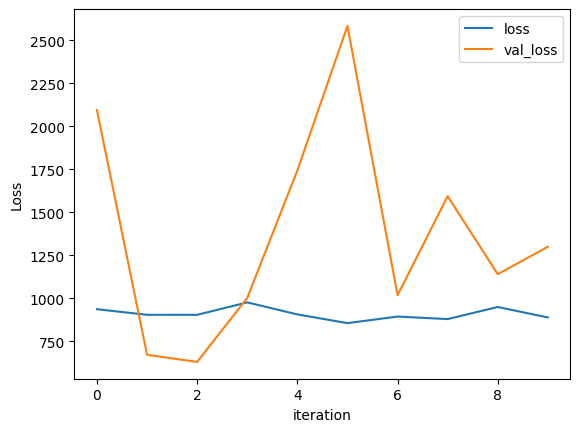

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

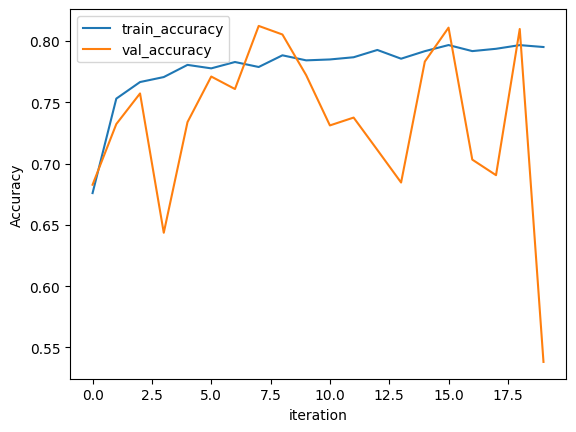

In [8]:
import matplotlib.pyplot as plt
#%matplotlib qt

plt.plot(history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()